In [1]:
import numpy as np
import pandas as pd

from scipy.spatial import distance_matrix

import seaborn as sns
import matplotlib.pyplot as plt

In [163]:
# loading the policy files
path = '/home/mawongh/ws/datasets/'
policy01_fn = 'MDP_model_policy.csv'
policy02_fn = 'DP_g05_policy.csv'
policy03_fn = 'DP_g09_policy.csv'
policy04_fn = 'SARSA_g09_policy.csv'
policy05_fn = 'DQN_50k_policy.csv'
policy06_fn = '300K_DQN_A_policy.csv'
policy07_fn = '300K_DQN_B_policy.csv'

policy_names = ['random', 'DP_g00', 'DP_g05', 'DP_g09',
                'SARSA_50K', 'DQN_50K', 'DQN_300K_A', 'DQN_300K_B']

policy01 = np.loadtxt(path + policy01_fn, delimiter=',')
policy02 = np.loadtxt(path + policy02_fn, delimiter=',')
policy03 = np.loadtxt(path + policy03_fn, delimiter=',')
policy04 = np.loadtxt(path + policy04_fn, delimiter=',')
policy05 = np.loadtxt(path + policy05_fn, delimiter=',')
policy06 = np.loadtxt(path + policy06_fn, delimiter=',')
policy07 = np.loadtxt(path + policy07_fn, delimiter=',')

# and the random policy
N = len(policy01)
policy00 = np.random.choice(126, size = (N,))

In [164]:
# putting all the policies in one variable

all_policies = np.stack((policy00, policy01, policy02, policy03,
                         policy04, policy05,
                        policy06, policy07), axis = 0)

In [165]:
# calculating the "similarity measure" 
mtrx = distance_matrix(all_policies, all_policies)
mtrx = np.abs(1-(mtrx / np.max(mtrx)))
mtrx = np.around(mtrx, decimals=3)

data = pd.DataFrame(data = mtrx, columns = policy_names,
                    index = policy_names)

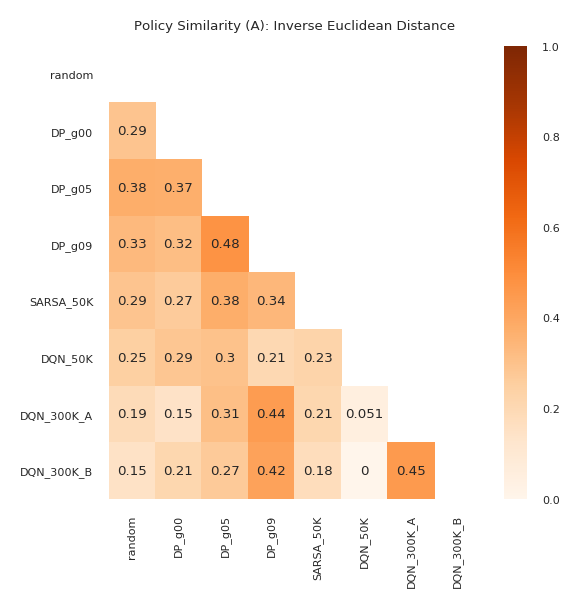

In [166]:
# showing the plot
plt.figure(figsize=(3,3), dpi = 200)


# Generate a mask for the upper triangle
mask = np.zeros_like(data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.set()
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=0.5)
sns.heatmap(data = data, cmap = 'Oranges', annot=True, mask = mask)
plt.title('Policy Similarity (A): Inverse Euclidean Distance')
plt.show()

In [129]:
def similarity(policyA, policyB):
        temp = policyA - policyB
        temp[np.nonzero(temp)] = 1
        return 1 - np.mean(temp)

In [167]:
sim_matrix = np.zeros_like(mtrx)

for policy_a in np.arange(all_policies.shape[0]):
    for policy_b in np.arange(all_policies.shape[0]):
        sim_matrix[policy_a, policy_b] = similarity(all_policies[policy_a,:]
                                                    , all_policies[policy_b,:])

sim_matrix = np.around(sim_matrix, decimals=2)
data2 = pd.DataFrame(data = sim_matrix, columns = policy_names,
                    index = policy_names)

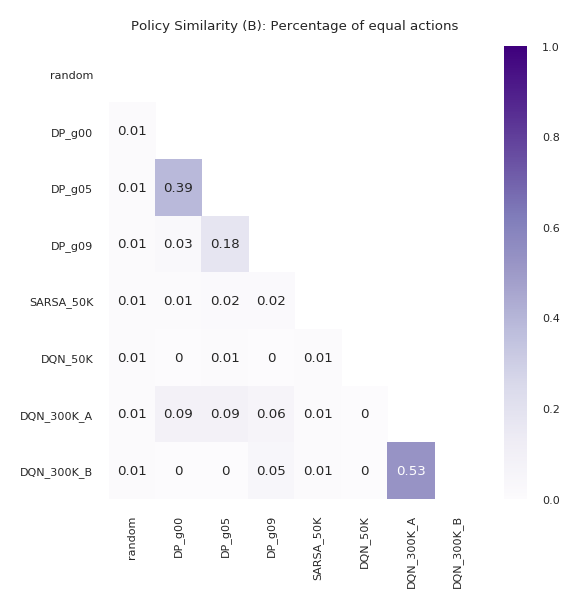

In [168]:
# showing the plot
plt.figure(figsize=(3,3), dpi = 200)


# Generate a mask for the upper triangle
mask = np.zeros_like(data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.set()
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=0.5)
sns.heatmap(data = data2, cmap = 'Purples', annot=True, mask = mask)
plt.title('Policy Similarity (B): Percentage of equal actions')
plt.show()